In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
df = pd.read_csv("/content/archive (2).zip")
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None


In [3]:
print(df.describe())

               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.000000  
max      3.000

In [4]:
print(df.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


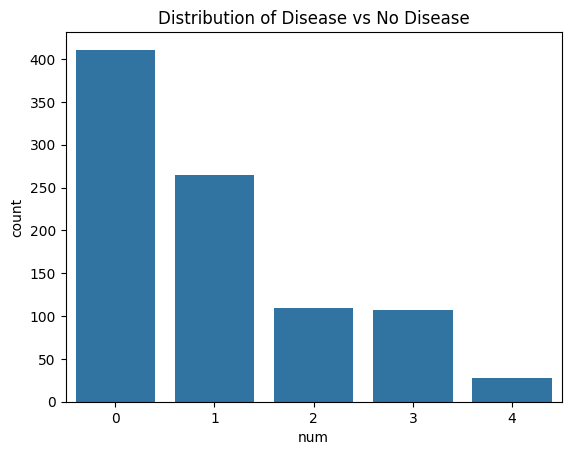

In [5]:
# Optional: Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='num', data=df)  # 'target' is usually the output label
plt.title('Distribution of Disease vs No Disease')
plt.show()

In [6]:
df['thal'].fillna(df['thal'].mode()[0], inplace=True)
df['slope'].fillna(df['slope'].mode()[0], inplace=True)

<ipython-input-6-5763b7813e7d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['thal'].fillna(df['thal'].mode()[0], inplace=True)
<ipython-input-6-5763b7813e7d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [7]:
# Split features and target

# Step 1: Create binary target column from 'num'
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Step 2: Drop unnecessary columns and encode categoricals
df_encoded = pd.get_dummies(df.drop(columns=['id', 'sex', 'dataset', 'num']), drop_first=True)

# Step 3: Define X and y
X = df_encoded.drop(columns='target')
y = df_encoded['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=20, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4557 - loss: nan - val_accuracy: 0.5270 - val_loss: nan
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4481 - loss: nan - val_accuracy: 0.5270 - val_loss: nan
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4627 - loss: nan - val_accuracy: 0.5270 - val_loss: nan
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4248 - loss: nan - val_accuracy: 0.5270 - val_loss: nan
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4508 - loss: nan - val_accuracy: 0.5270 - val_loss: nan
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4677 - loss: nan - val_accuracy: 0.5270 - val_loss: nan
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4577 - loss: nan - val_accuracy: 0.5270 - val_loss: nan
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4389 - loss: nan - val_accuracy: 0.5270 - val_loss: nan
Epoch 9/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0

In [10]:
# Evaluate on test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Predict on test set
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4014 - loss: nan 

Test Accuracy: 0.4076
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [11]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.41      1.00      0.58        75
           1       0.00      0.00      0.00       109

    accuracy                           0.41       184
   macro avg       0.20      0.50      0.29       184
weighted avg       0.17      0.41      0.24       184


Confusion Matrix:
[[ 75   0]
 [109   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
import joblib

# Save scaler and model
joblib.dump(scaler, 'scaler.pkl')
model.save('heart_disease_model.h5')

In [14]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.0 MB/s eta 0:00:00


In [15]:
import streamlit as st
import numpy as np
import joblib
from tensorflow.keras.models import load_model

# Load model and scaler
model = load_model('heart_disease_model.h5')
scaler = joblib.load('scaler.pkl')

st.title("Heart Disease Predictor")

# Input form
age = st.number_input('Age', 20, 100, 50)
trestbps = st.number_input('Resting Blood Pressure', 80, 200, 120)
chol = st.number_input('Cholesterol', 100, 600, 200)
thalach = st.number_input('Max Heart Rate Achieved', 60, 220, 150)
oldpeak = st.number_input('Oldpeak (ST depression)', 0.0, 6.0, 1.0)
# Add other features like cp_*, restecg_*, etc. as checkboxes or dropdowns

# Button to predict
if st.button('Predict'):
    input_data = np.array([[age, trestbps, chol, thalach, oldpeak]])  # Add encoded features as needed
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)[0][0]
    st.success("Disease Detected" if prediction > 0.5 else "No Disease Detected")


2025-06-05 17:35:51.400 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 17:35:51.594 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-05 17:35:51.599 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 17:35:51.600 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 17:35:51.603 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 17:35:51.604 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 17:35:51.609 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 17:35:51.610 Session state does not 

In [ ]:
import streamlit as st
import numpy as np
import joblib
from tensorflow.keras.models import load_model

# Load trained model and scaler
model = load_model('heart_disease_model.h5')
scaler = joblib.load('scaler.pkl')

st.title("🫀 UCI Heart Disease Predictor")

st.markdown("Enter patient data below:")

# Input fields
age = st.slider('Age', 20, 100, 50)
trestbps = st.slider('Resting Blood Pressure (mm Hg)', 80, 200, 120)
chol = st.slider('Cholesterol (mg/dL)', 100, 600, 200)
thalch = st.slider('Max Heart Rate Achieved', 60, 220, 150)
oldpeak = st.slider('Oldpeak (ST Depression)', 0.0, 6.0, 1.0)
ca = st.slider('Number of Major Vessels (0–3)', 0, 3, 0)

# Chest pain type (cp)
cp_option = st.selectbox("Chest Pain Type", ['asymptomatic', 'atypical angina', 'non-anginal', 'typical angina'])
cp_values = {
    'cp_atypical angina': 0,
    'cp_non-anginal': 0,
    'cp_typical angina': 0
}
if cp_option != 'asymptomatic':
    cp_values[f'cp_{cp_option}'] = 1

# Fasting blood sugar
fbs = st.checkbox('Fasting Blood Sugar > 120 mg/dL')

# Resting ECG
restecg_option = st.selectbox("Resting ECG Results", ['left ventricular hypertrophy', 'normal', 'st-t abnormality'])
restecg_values = {
    'restecg_normal': 0,
    'restecg_st-t abnormality': 0
}
if restecg_option == 'normal':
    restecg_values['restecg_normal'] = 1
elif restecg_option == 'st-t abnormality':
    restecg_values['restecg_st-t abnormality'] = 1

# Exercise induced angina
exang = st.checkbox('Exercise Induced Angina')

# Slope of ST
slope_option = st.selectbox("Slope of Peak Exercise ST Segment", ['downsloping', 'flat', 'upsloping'])
slope_values = {
    'slope_flat': 0,
    'slope_upsloping': 0
}
if slope_option == 'flat':
    slope_values['slope_flat'] = 1
elif slope_option == 'upsloping':
    slope_values['slope_upsloping'] = 1

# Thalassemia
thal_option = st.selectbox("Thalassemia Type", ['fixed defect', 'normal', 'reversable defect'])
thal_values = {
    'thal_normal': 0,
    'thal_reversable defect': 0
}
if thal_option == 'normal':
    thal_values['thal_normal'] = 1
elif thal_option == 'reversable defect':
    thal_values['thal_reversable defect'] = 1

# Create final feature vector
input_data = [
    age, trestbps, chol, thalch, oldpeak, ca,
    cp_values['cp_atypical angina'],
    cp_values['cp_non-anginal'],
    cp_values['cp_typical angina'],
    int(fbs),
    restecg_values['restecg_normal'],
    restecg_values['restecg_st-t abnormality'],
    int(exang),
    slope_values['slope_flat'],
    slope_values['slope_upsloping'],
    thal_values['thal_normal'],
    thal_values['thal_reversable defect']
]

input_scaled = scaler.transform([input_data])

# Predict on button click
if st.button('Predict'):
    prediction = model.predict(input_scaled)[0][0]
    st.subheader("🩺 Prediction Result:")
    st.success("🔴 Disease Detected" if prediction > 0.5 else "🟢 No Disease Detected")
    st.write(f"Confidence: {prediction:.2f}")


In [16]:
%%writefile app.py

Writing app.py


In [19]:
! wget -q -O - ipv4.icanhazip.com

35.233.196.124


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.233.196.124:8501

⠴your url is: https://social-waves-arrive.loca.lt
2025-06-05 17:38:58.851127: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749145138.881239    2569 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749145138.890205    2569 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-05 17:39:03.532394: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/usr/local/lib/python3.1